## <span style = 'color : Olive' > Advanced Linear Regression - House Price Prediction - Submitted by Merrymel George

### <span style = 'color : Navy' >Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### <span style = 'color : Navy' >Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### <span style = 'color : SteelBlue' > Importing the required packages

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <span style = 'color : SaddleBrown' >Step 1. Data Reading

In [2]:
# Data from the csv file is loaded using pandas and 'housedata' dataframe is created
housedata = pd.read_csv('train.csv')

### <span style = 'color : SaddleBrown'>Step 2. Data Understanding, Cleansing, EDA and Outlier Treatment

In [3]:
# First 5 rows of the dataframe
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Total number of rows and columns of the dataframe
housedata.shape

(1460, 81)

### <span style = 'color : ForestGreen' >Inference - There are 81 attributes and 1460 rows

In [5]:
# Understanding the data types of each attribute
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Separating the numerical attributes and categorical attributes
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('Count of numerical attributes: ', len(num_attr))
print('Count of catagorical variables: ', len(cat_attr))

Count of numerical attributes:  38
Count of catagorical variables:  43


In [7]:
#Finding the attributes in numerical features that has 5 or less unqiue values
cat_in_num = housedata[num_attr].loc[:, housedata[num_attr].nunique() < 6].columns.to_list()
print(cat_in_num)

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']


### <span style = 'color : ForestGreen' >Inference - 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold' attributes can be considered as categorical features as they have only 5 or less unique values

In [8]:
#Changing the data type of the caterogical columns with numerical values to 'object' type
housedata[cat_in_num] = housedata[cat_in_num].astype(object)

In [9]:
#Rebuilding the list of numerical features and catgeorical features
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('New count of numerical attributes: ', len(num_attr))
print('New count of catagorical variables: ', len(cat_attr))

New count of numerical attributes:  30
New count of catagorical variables:  51


In [10]:
#Finding the attributes that have more than 90% of its data as NULL values
print(housedata.isnull().sum()[(housedata.isnull().sum()) > (0.80*len(housedata))].sort_values(ascending=False))

#creating a list of columns to drop
cols_to_drop = list(housedata.isnull().sum()[(housedata.isnull().sum()) > (0.80*len(housedata))].index)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
dtype: int64


In [11]:
#Dropping the columns
housedata.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
#Finding the attributes that have more than 95% of its data as unqiue values
print(housedata.columns[housedata.nunique()> 0.95*(len(housedata))])

#Adding the columns to the list of columns to drop
cols_to_drop = []
cols_to_drop.extend(housedata.columns[housedata.nunique()> 0.95*(len(housedata))].to_list())

Index(['Id'], dtype='object')


In [13]:
#Finding the attributes that have 2 or less values of its data as unqiue values
print(housedata.columns[housedata.nunique()< 3])

#Checking the 
for i in list(housedata.columns[housedata.nunique()< 3]):
    print()
    print(i)
    print(housedata[i].value_counts())
    print(housedata[i].value_counts()/len(housedata)*100)

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64


### <span style = 'color : ForestGreen' >Inference - Though 'Street', 'Utilities' and 'CentralAir' features have only 2 unique values, 'Street' and 'Utilities' have more than 99.5% of it's value as one value and less than 0.05% as the other value('Street' - 6 records and 'Utilities' - 1 record)

In [14]:
#Adding the columns to the list of columns to drop
cols_to_drop.extend(['Street', 'Utilities'])

In [15]:
#Dropping the columns
housedata.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = []

In [16]:
#Checking for temporal features
time_attr = [attr for attr in housedata.columns if 'Yr' in attr or 'Year' in attr ]
print(time_attr)

#Certain temporal features makes senese when they are converted to age rather than keeping them as dates
housedata['Built_Age'] = housedata['YearBuilt'].max() - housedata['YearBuilt']
housedata['Remodel_Age'] = housedata['YearRemodAdd'].max() - housedata['YearRemodAdd']
housedata['GargeBuilt_Age'] = housedata['GarageYrBlt'].max() - housedata['GarageYrBlt']
housedata['Selling_Age'] = housedata['YrSold'].max() - housedata['YrSold']

#Adding the corresponding date attributes to the list of columns to be dropped
cols_to_drop.extend(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [17]:
#Dropping the columns
housedata.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = []

In [18]:
#Finding the categorical features that has at least one NULL/NaN/NA values 
sorted([x for x in list(housedata.isnull().sum()[(housedata.isnull().sum()) > 0].index) if x in cat_attr])

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType']

In [19]:
#Replacing the Null/NA/NaN values in the features based on business understanding from the data dictionary
housedata["BsmtCond"] = housedata["BsmtCond"].fillna("No Basement")
housedata["BsmtExposure"] = housedata["BsmtExposure"].fillna("No Basement")
housedata["BsmtFinType1"] = housedata["BsmtFinType1"].fillna("No Basement")
housedata["BsmtFinType2"] = housedata["BsmtFinType2"].fillna("No Basement")
housedata["BsmtQual"] = housedata["BsmtQual"].fillna("No Basement")
housedata["FireplaceQu"] = housedata["FireplaceQu"].fillna("No Fireplace")
housedata["GarageCond"] = housedata["GarageCond"].fillna("No Garage")
housedata["GarageFinish"] = housedata["GarageFinish"].fillna("No Garage")
housedata["GarageQual"] = housedata["GarageQual"].fillna("No Garage")
housedata["GarageType"] = housedata["GarageType"].fillna("No Garage")
housedata["MasVnrType"] = housedata["MasVnrType"].fillna("None")

#Imputing the missing values of the categorical feature using mode as no specification is there in data dictionary
housedata["Electrical"] = housedata["Electrical"].fillna(housedata["Electrical"].mode()[0])

In [20]:
#Rebuilding the list of numerical features and catgeorical features
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('New count of numerical attributes: ', len(num_attr))
print('New count of catagorical variables: ', len(cat_attr))

New count of numerical attributes:  29
New count of catagorical variables:  45


In [21]:
#Finding the numerical features that has at least one NULL/NaN/NA values
sorted([x for x in list(housedata.isnull().sum()[(housedata.isnull().sum()) > 0].index) if x in num_attr])

['GargeBuilt_Age', 'LotFrontage', 'MasVnrArea']

In [22]:
#Checking the mean and median values for the numerical features to impute the missing values
for x in (['GargeBuilt_Age','LotFrontage', 'MasVnrArea']):
    print()
    print(x) 
    print('Mean  ' ,housedata[x].mean())
    print('Median', housedata[x].median())


GargeBuilt_Age
Mean   31.493836113125454
Median 30.0

LotFrontage
Mean   70.04995836802665
Median 69.0

MasVnrArea
Mean   103.68526170798899
Median 0.0


### <span style = 'color : ForestGreen' >Inference - As 'LotFrontage' and 'GargeBuilt_Age' are integer values, and as there isn't noticable difference between mean and median, imputing the missing values of 'LotFrontage' and 'GargeBuilt_Age' with median values

<AxesSubplot:xlabel='MasVnrArea'>

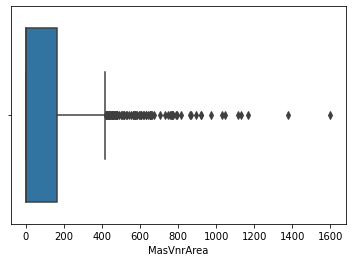

In [23]:
#Understanding the huge difference in mean and median value for MasVnrArea
sns.boxplot(x='MasVnrArea', data = housedata)

### <span style = 'color : ForestGreen' >Inference - There are a lot of outliers in the 'MasVnrArea' which is the reason for the huge difference in it's mean and median value. Hence, the logical way is to impute the missing values with median

In [24]:
#Imputing the missing values of the categorical feature using mode as no specification is there in data dictionary
housedata["GargeBuilt_Age"] = housedata["GargeBuilt_Age"].fillna(housedata["GargeBuilt_Age"].median())
housedata["LotFrontage"] = housedata["LotFrontage"].fillna(housedata["LotFrontage"].median())
housedata["MasVnrArea"] = housedata["MasVnrArea"].fillna(housedata["MasVnrArea"].median())

In [25]:
#Checking if there are any more null/NaN values
housedata.isnull().sum()[(housedata.isnull().sum()) > 1]

Series([], dtype: int64)

In [26]:
#Checking the number of numerical and categorical varibales after the various column drops
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('Count of numerical attributes: ', len(num_attr))
print('Count of catagorical variables: ', len(cat_attr))

Count of numerical attributes:  29
Count of catagorical variables:  45


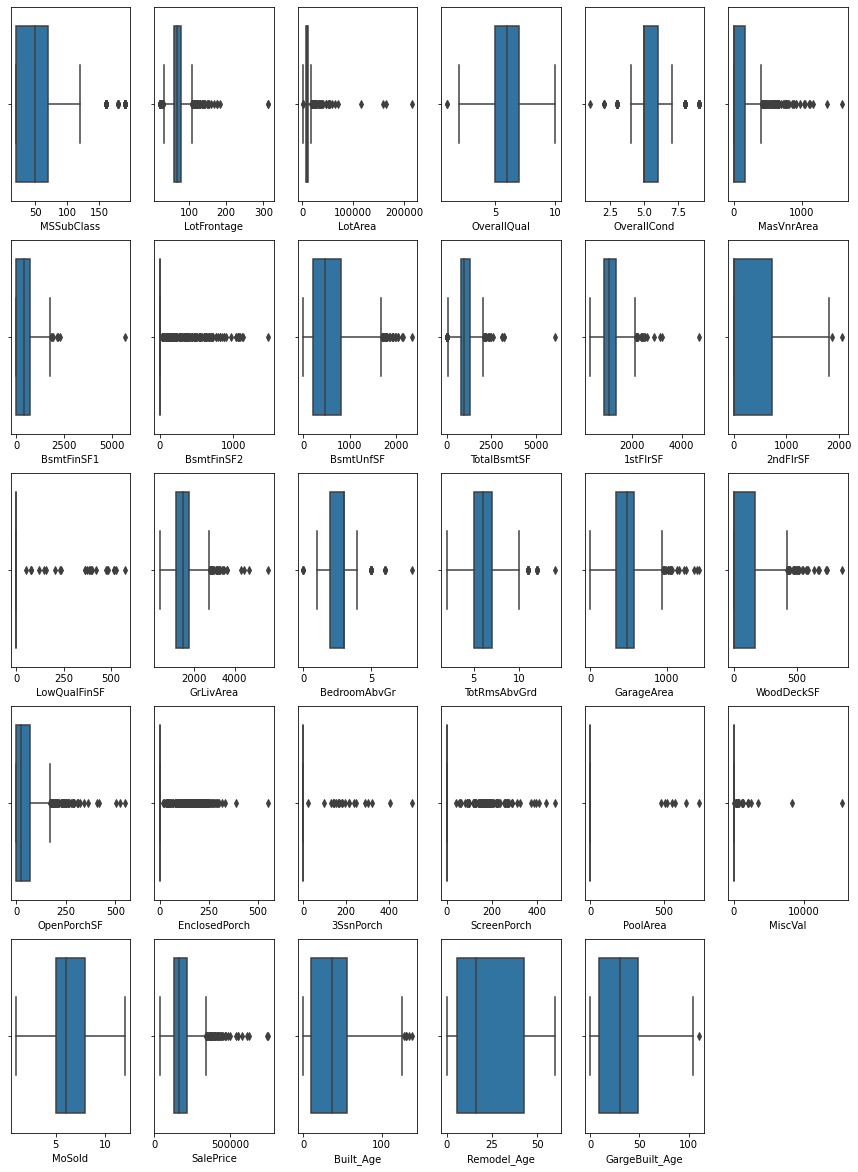

In [27]:
#Plotting the box plots of various numerical variables to understand outliers in each of them
plt.figure(figsize=(15,25))
for ind,x in enumerate(num_attr):
    plt.subplot(6,6,ind+1)
    sns.boxplot(x=x, data = housedata)
plt.show()

### <span style = 'color : ForestGreen' >Inference - Above plots shows existence of outliers. For attributes like 'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', it is better to drop them as the  quartile range is very small. For rest of the attributes, data can be considered from the 0.5th percentile to 99.5th percentile

In [28]:
#Removing Outliers of the identified columns
for i in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF','WoodDeckSF']:
    housedata = housedata[housedata[i] <= housedata[i].quantile(0.995)]
    housedata = housedata[housedata[i] >= housedata[i].quantile(0.005)]

In [29]:
# Adding the columns identified from the boxplot that needs to be dropped to column drop list 
housedata.drop(['BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [30]:
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Built_Age,Remodel_Age,GargeBuilt_Age,Selling_Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,12,WD,Normal,250000,10,10,10.0,2


In [31]:
#Checking the number of numerical and categorical varibales after the various column drops
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('Count of numerical attributes: ', len(num_attr))
print('Count of catagorical variables: ', len(cat_attr))

Count of numerical attributes:  22
Count of catagorical variables:  45


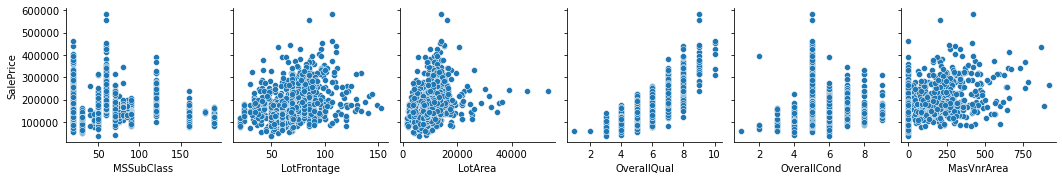

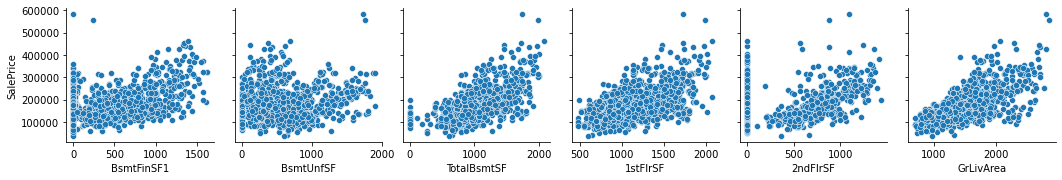

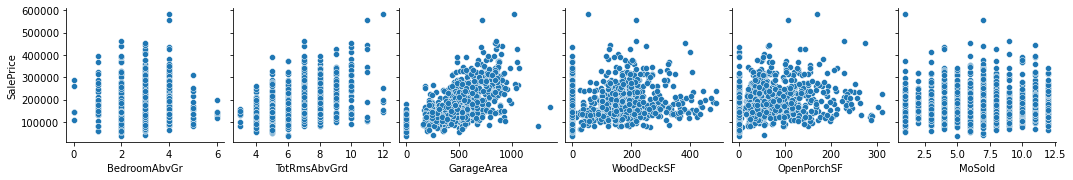

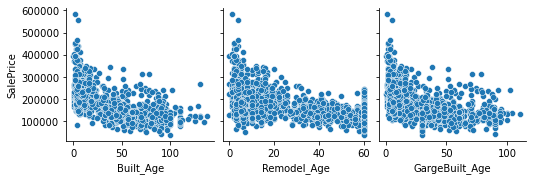

In [32]:
#Plotting the various numerical attributes against 'SalePrice' to understand the relationship
plot_vars = [x for x in num_attr if x != 'SalePrice']
for i in range(0,len(plot_vars),6):
    sns.pairplot(housedata, x_vars=plot_vars[i:i+6], y_vars='SalePrice')

### <span style = 'color : ForestGreen' >Inference - From the plots it can be infered that certain features like 'OverallQual', 'GrLivArea' etc seems to have a positive correlation with 'SalePrice' while features like 'Built_Age', 'Remodel_Age', 'GarageBuilt_Age' etc seems to have a negative correlation with 'SalePrice', and features like 'BsmtUnfSF', 'BedroomAbvGr' etc doesn't seem to have any correlation with SalePrice. But, it is better to plot the correlation matrix to confirm the inference

### <span style = 'color : ForestGreen' >Also, looking into the plots above, though 'OverallQual', 'OverallCond','BedroomAbvGr', 'TotRmsAbvGrd'and 'MoSold' have more number of unique variables to be considered as numerical features, plotting the boxplot will be more sensible to understand the data

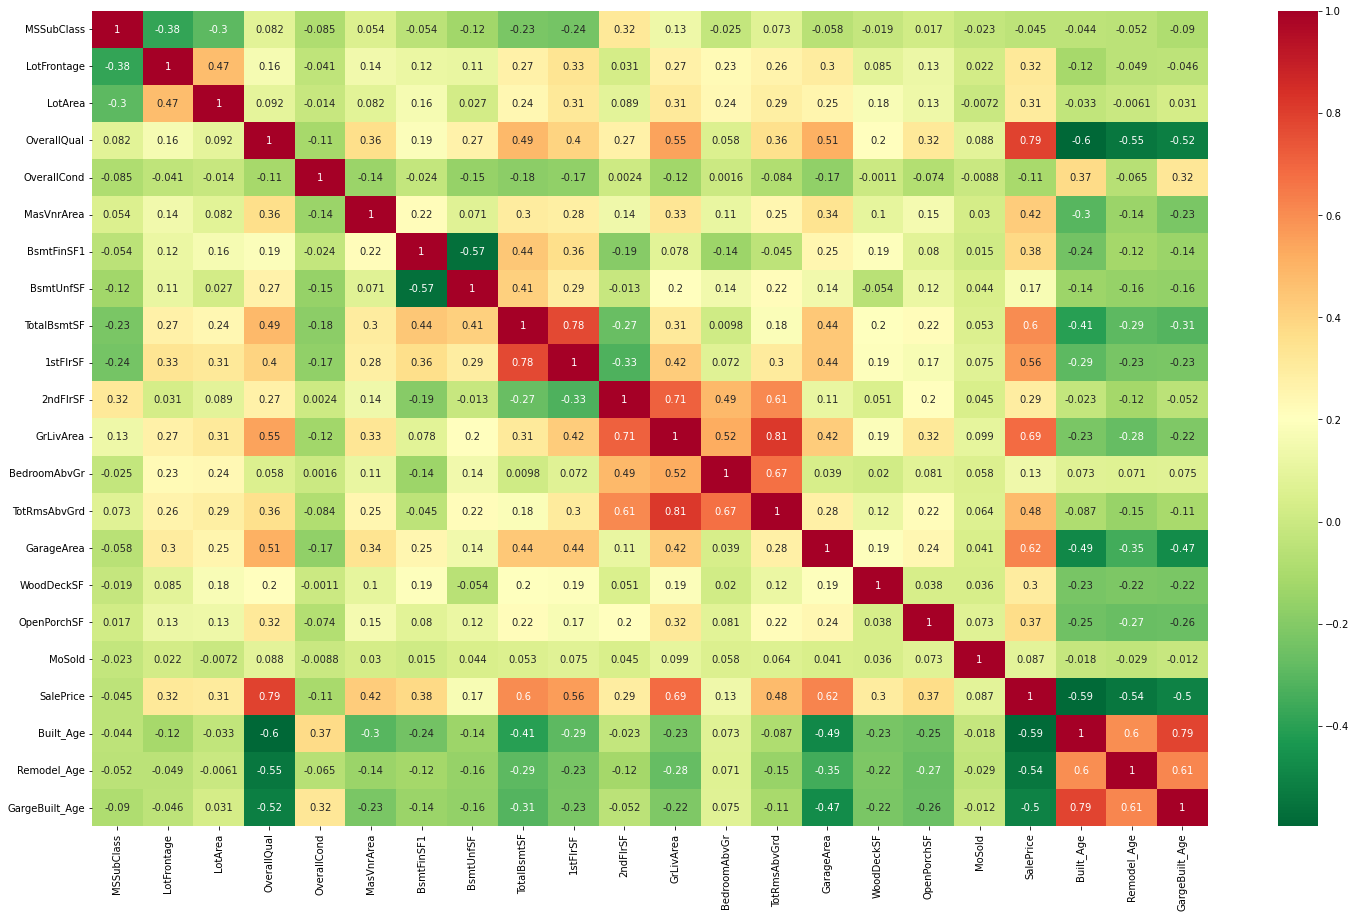

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 15))
sns.heatmap(housedata.corr(), annot = True, cmap="RdYlGn_r")
plt.show()

In [34]:
#find pairs of attributes that have high correlation among them excluding target feature(SalesPrice) 
correl_absolute = housedata.loc[:,~housedata.columns.isin(['SalePrice'])].corr().abs()
strong_rel_vars=np.where(correl_absolute>0.75)
highly_correl_vars=[(correl_absolute.columns[x],correl_absolute.columns[y]) for x,y in zip(*strong_rel_vars) if x!=y and x<y]
print(highly_correl_vars)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('Built_Age', 'GargeBuilt_Age')]


### <span style = 'color : ForestGreen' >Inference - High correlation between these features is a hint of existence of multicollinearity 

In [35]:
#Adding one of the columns from the above pairs to remove from the dataframe to minimize multicollinearity
cols_to_drop.extend(['TotalBsmtSF', 'GrLivArea', 'GargeBuilt_Age'])

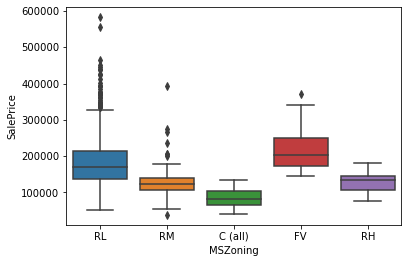

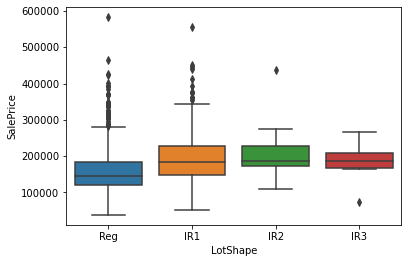

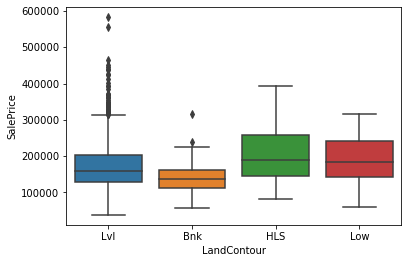

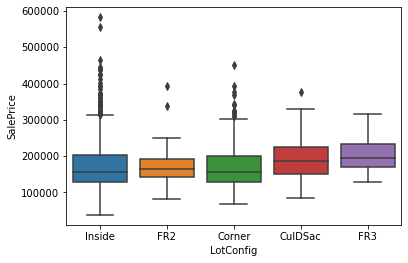

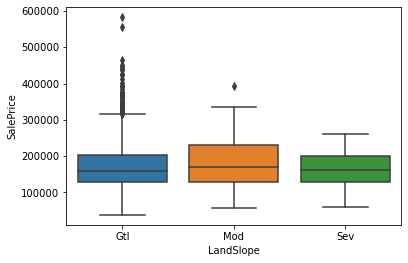

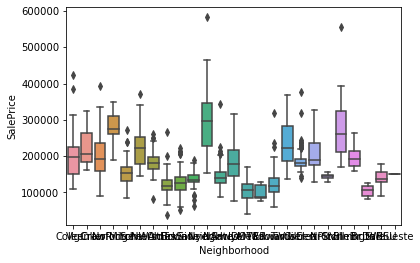

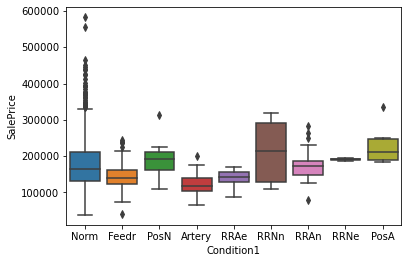

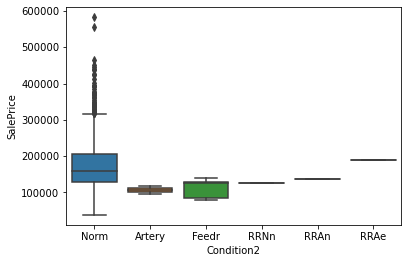

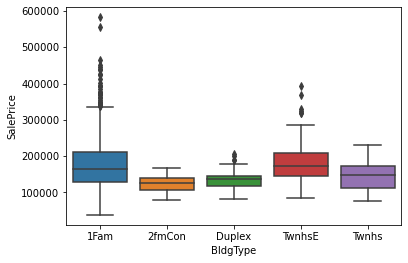

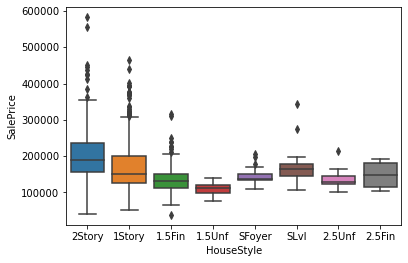

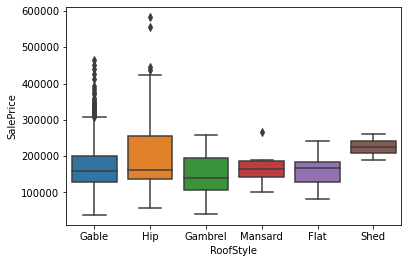

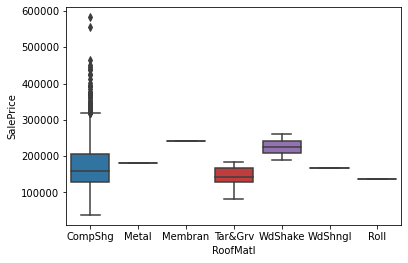

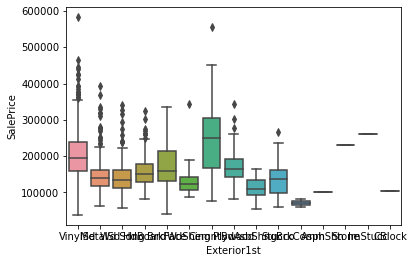

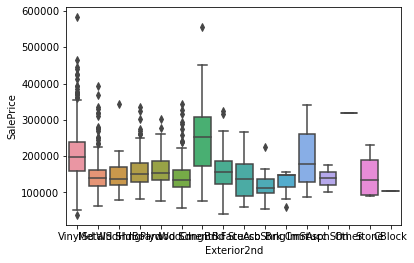

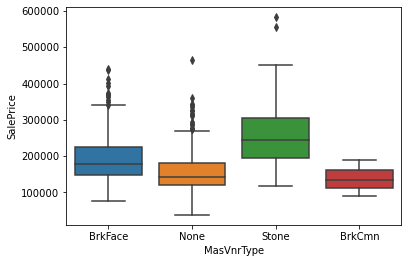

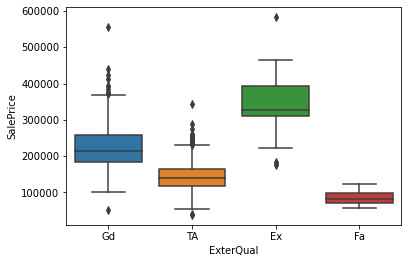

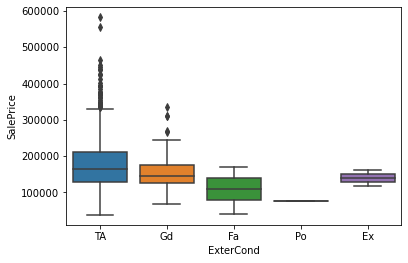

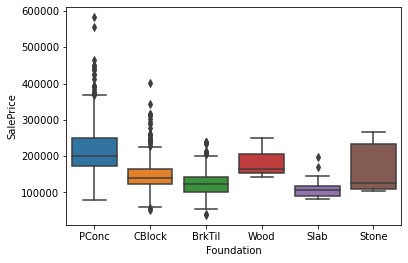

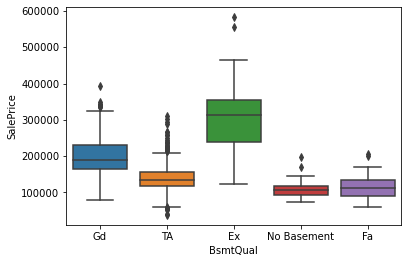

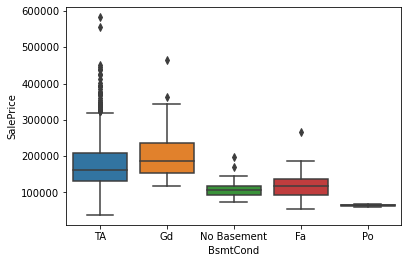

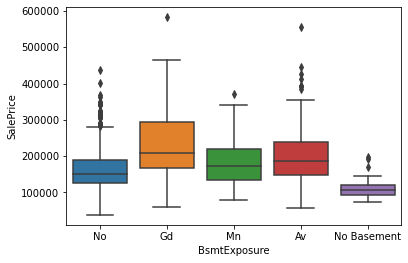

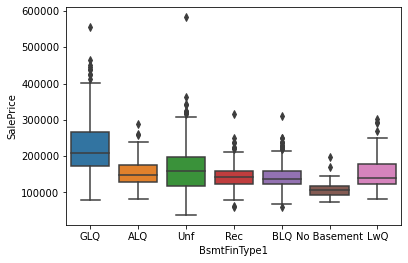

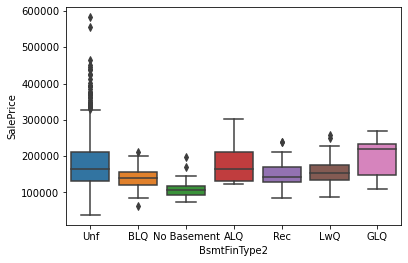

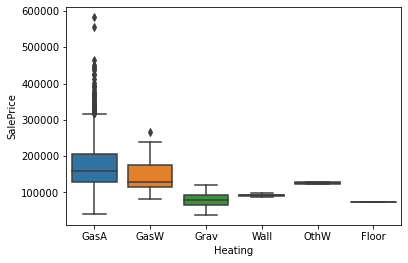

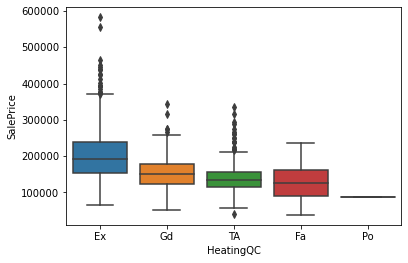

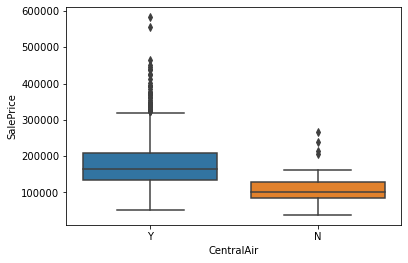

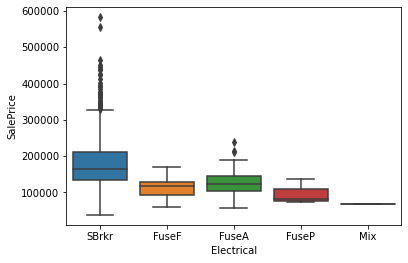

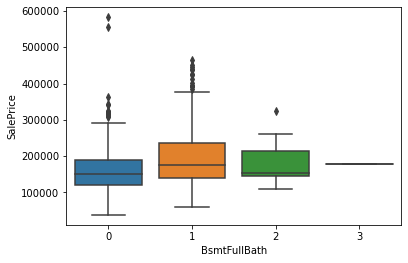

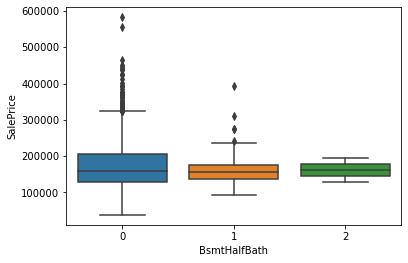

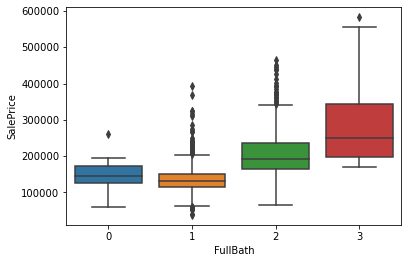

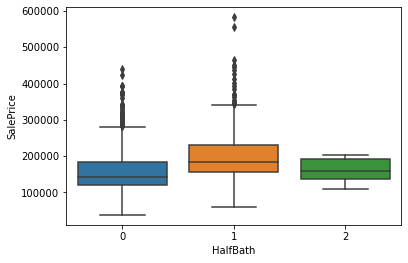

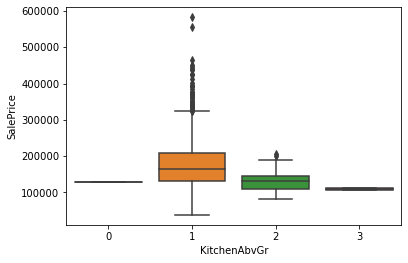

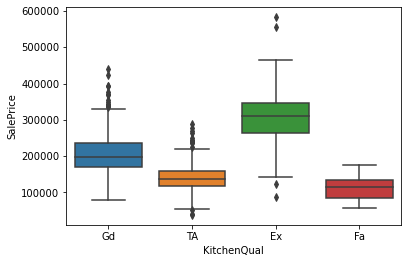

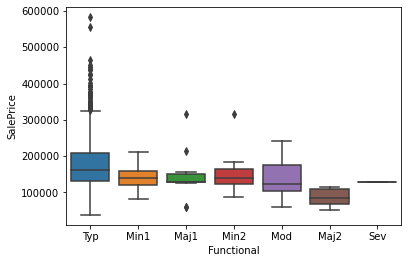

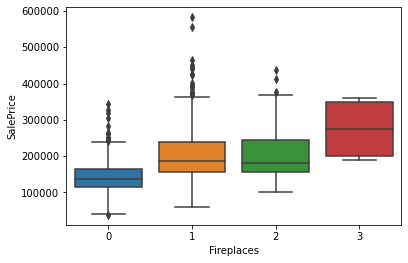

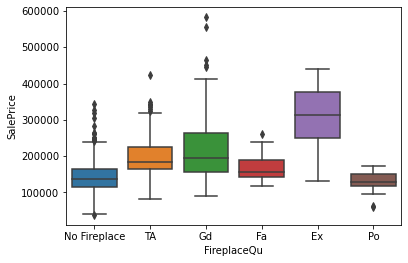

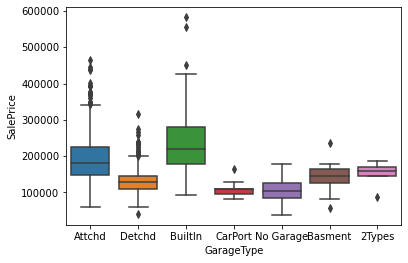

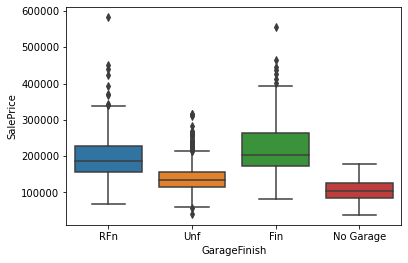

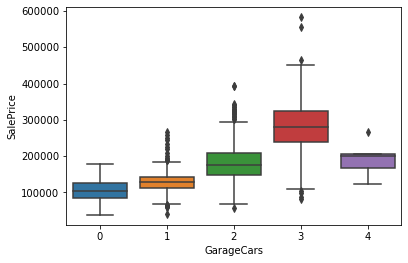

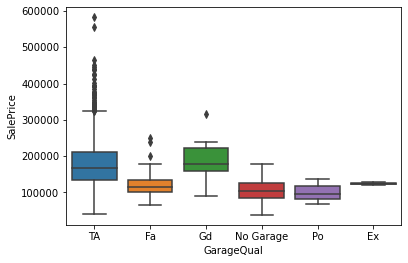

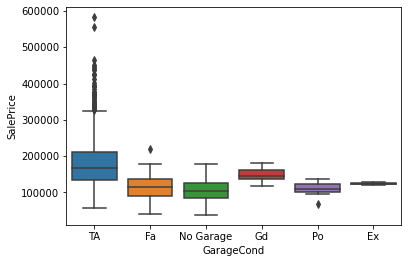

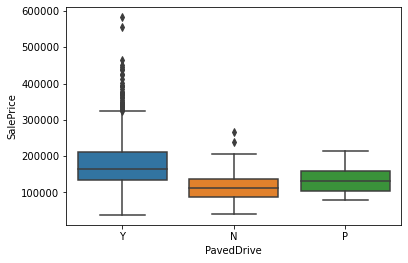

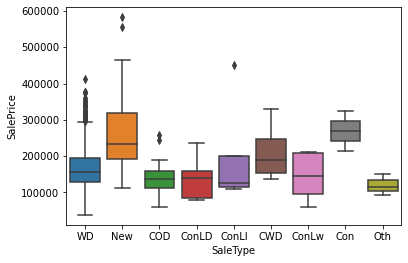

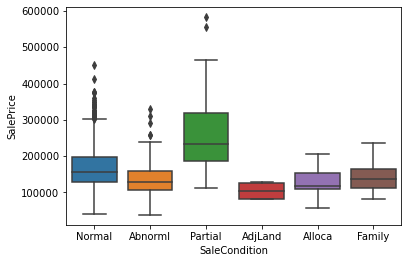

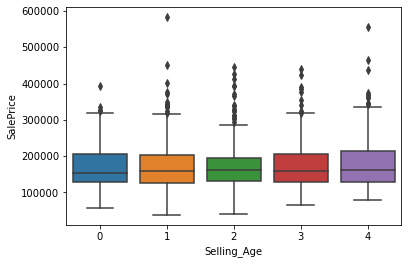

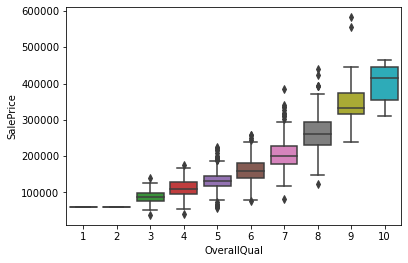

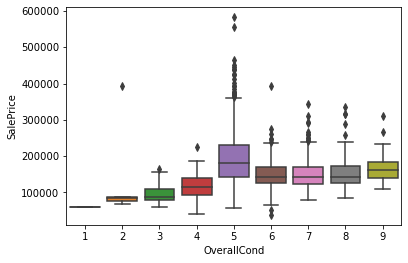

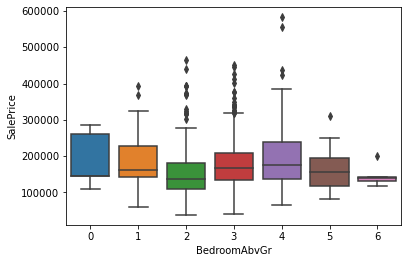

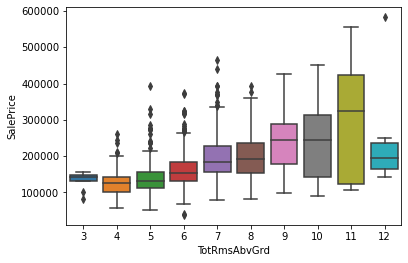

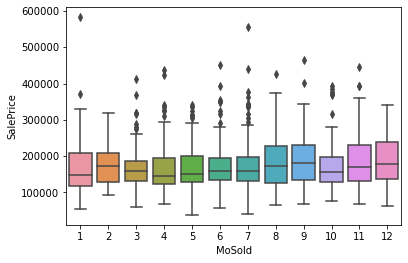

In [36]:
#Plotting the various categorical attributes against 'SalePrice' to understand the relationship
plot_cols = cat_attr[:]

#Adding the 'OverallQual', 'OverallCond','BedroomAbvGr', 'TotRmsAbvGrd','MoSold' to the categorical attribute list based
#previous findings
plot_cols.extend(['OverallQual', 'OverallCond','BedroomAbvGr', 'TotRmsAbvGrd','MoSold'])
for i in range(len(plot_cols)):
    plt.subplots()
    sns.boxplot(x=plot_cols[i], y="SalePrice", data=housedata)

### <span style = 'color : ForestGreen' >Notable Inferences :
- 'Floating Village Residential' (MSZoning = 'FV') zone houses are comparitively higher priced than other categories 
- Houses with 'Excellent' (Ex) basement quality (BsmtQual) have higher prices than all the other categories in the same regard
- 'Central Air conditioning' (CentralAir) houses are higher priced that those which doesn't have the same
- It can be broadly generalized that as the quality of the 'Electrical System' (Electrical) drops, the prices of the house also drops    
- As the number of 'Full bathrooms above grade'(FullBath) from 1 to 3, the average sale price also shows an increase
- Though , generally, house prices drops as the number of 'Kitchens above grade'(KitchenAbvGr) moves from 1 to 3, houses with an 'Excellent' (Ex) Kitchen quality (KitchenQual) have higher prices
- Houses with Fireplace quality(FireplaceQu) as 'Excellent'(Ex) have higher sale price than others, but the number of fireplace(Fireplaces) doesn't show a monotonic trend
- Houses with 'No Garage' have generally lower price than those with some type of garages, and as the size of garage in car capacity(GarageCars) increases, the price also increases
- Prices of 'Home just constructed and sold' (New) in the type of sale('SaleType') have relatively higher
- As the 'OverallQual' (Rates the overall material and finish of the house) increases, the prices also increases

In [37]:
#Dropping the columns
housedata.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = []

In [38]:
#Checking the number of numerical and categorical varibales after the various column drops
num_attr = [col for col in housedata.columns if housedata[col].dtypes != 'O']
cat_attr = [col for col in housedata.columns if housedata[col].dtypes == 'O']
print('Count of numerical attributes: ', len(num_attr))
print('Count of catagorical variables: ', len(cat_attr))

Count of numerical attributes:  19
Count of catagorical variables:  45


### <span style = 'color : SaddleBrown'>Step 3. Data Preprocessing - Manual Encoding and Dummy Variable creation

In [39]:
#Manual Encoding of ordinal categorical variables based on business and data understanding

def NAPoFaTAGdEx(x):
    return x.map({'No Fireplace':0, 'No Basement':0,'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

def BsmntFin(x):
     return x.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

for i in (['BsmtQual','BsmtCond','ExterCond','ExterQual','HeatingQC','KitchenQual','FireplaceQu','GarageCond','GarageQual']):
    housedata[i] = housedata[[i]].apply(NAPoFaTAGdEx)

for i in (['BsmtFinType1','BsmtFinType2']):
    housedata[i] = housedata[[i]].apply(BsmntFin)

housedata['BsmtExposure'] = housedata['BsmtExposure'].map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housedata['CentralAir'] = housedata['CentralAir'].map({'N':0,'Y':1})
housedata['GarageFinish'] = housedata['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
housedata['LandSlope'] = housedata['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housedata['LotShape'] = housedata['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
housedata['PavedDrive'] = housedata['PavedDrive'].map({'N':0,'P':1,'Y':2})

encoded_cat_attr = ['BsmtQual','BsmtCond','ExterCond','ExterQual','HeatingQC','KitchenQual','FireplaceQu','GarageCond',
                    'GarageQual','BsmtExposure', 'CentralAir', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive']

In [40]:
 housedata[encoded_cat_attr].head()

,BsmtQual,BsmtCond,ExterCond,ExterQual,HeatingQC,KitchenQual,FireplaceQu,GarageCond,GarageQual,BsmtExposure,CentralAir,GarageFinish,LandSlope,LotShape,PavedDrive
0,4,3,3,4,5,4,0,3,3,1,1,2,0,0,2
1,4,3,3,3,5,3,3,3,3,4,1,2,0,0,2
2,4,3,3,4,5,4,3,3,3,2,1,2,0,1,2
3,3,4,3,3,4,4,4,3,3,1,1,1,0,1,2
4,4,3,3,4,5,4,3,3,3,3,1,2,0,1,2


In [41]:
#Creating dummies for the rest of the categorical variables
for attr in (set(cat_attr)-set(encoded_cat_attr)):
    dummies = pd.get_dummies(housedata[attr], drop_first = True)
    dummies = dummies.add_prefix(f'{attr}_')
    housedata = pd.concat([housedata, dummies], axis = 1)
    housedata.drop([attr], axis = 1, inplace = True)

housedata.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,0,0,7,5,196.0,4,3,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,0,0,6,8,0.0,3,3,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,1,0,7,5,162.0,4,3,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,1,0,7,5,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,1,0,8,5,350.0,4,3,...,0,0,0,0,0,0,0,1,0,0


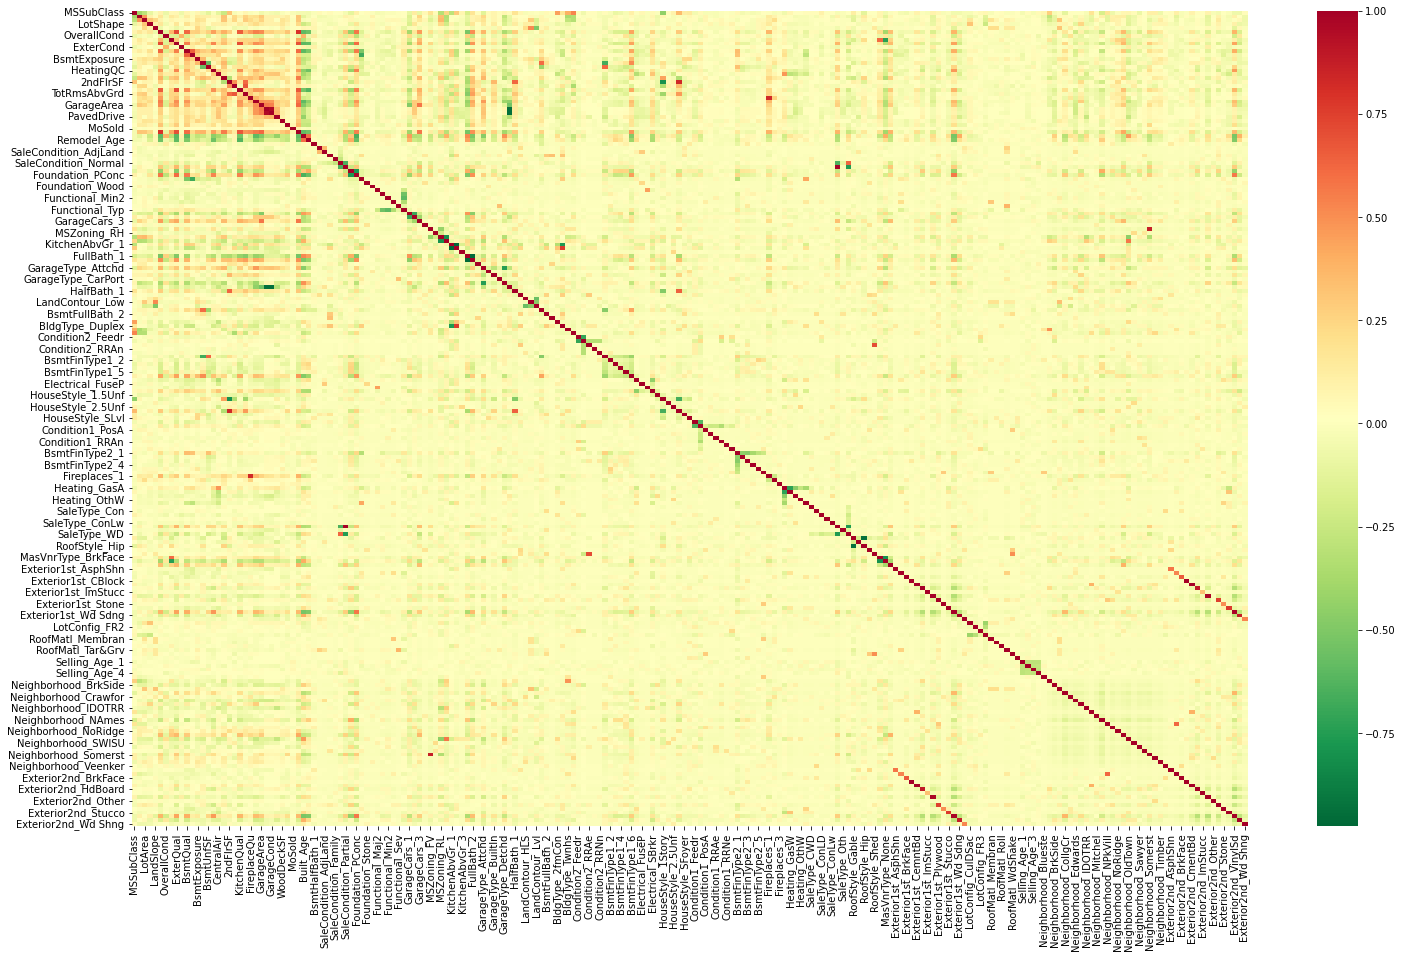

In [42]:
#Plotting the correlation heatmap of housedata attributes
plt.figure(figsize=(25,15))
sns.heatmap(housedata.corr(), cmap="RdYlGn_r", annot=False)
plt.show()

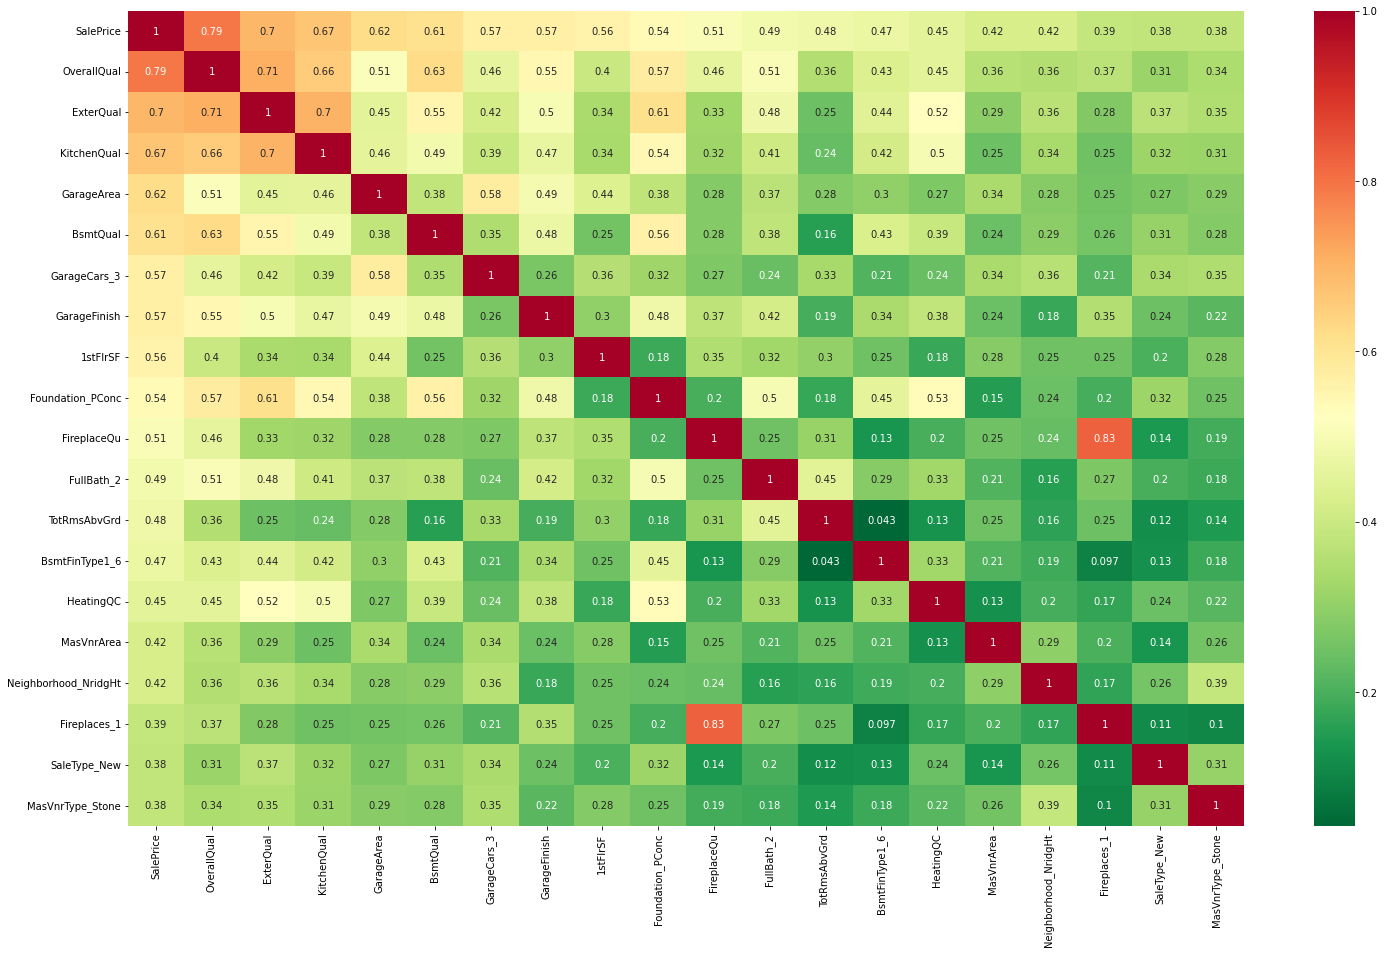

In [43]:
#Finding the top 20 features that has the highest correlation with 'SalesPrice'
n = 20 
correl = housedata.corr()
attr = correl.nlargest(n, 'SalePrice')['SalePrice'].index

plt.figure(figsize = (25, 15))
sns.heatmap(housedata[attr].corr(),annot=True, cmap="RdYlGn_r")
plt.show()

### <span style = 'color : ForestGreen' >Inference - There are still many attributes that shows high correlation, and hence the presence of mutlicollinearity. Hence, it is better to do Recursive Feature Elimination to find the top contributing features

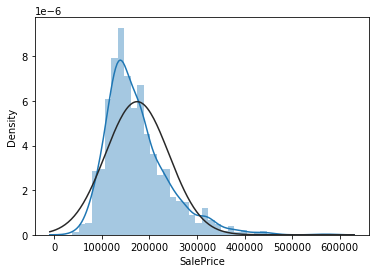

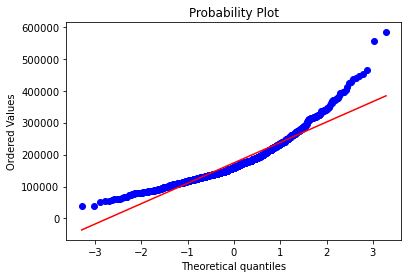

In [44]:
#Plotting the Density distribution of SalesPrice data
sns.distplot(housedata['SalePrice'] , fit=norm);

#Plotting the QQ plot
fig = plt.figure()
res = stats.probplot(housedata['SalePrice'], plot=plt)
plt.show()

### <span style = 'color : ForestGreen' >Inference - The target variable - SalePrice values aren't normally distributed. Hence, it might be a good option to take the log values of Sales Prices and checking for the normality of distribution

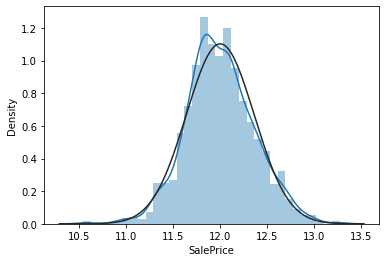

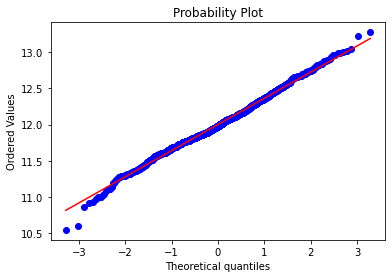

In [45]:
#Converting the 'SalePrice' data to corresponding log values
housedata['SalePrice'] = np.log(housedata["SalePrice"])

#Plotting the Density distribution of log of SalesPrice data
sns.distplot(housedata['SalePrice'] , fit=norm);

#Plotting the QQ Plot
fig = plt.figure()
res = stats.probplot(housedata['SalePrice'], plot=plt)
plt.show()

### <span style = 'color : SaddleBrown'>Step 4. Test-Train Data Split and Feature Scaling

In [46]:
np.random.seed(25)
housedata_train,housedata_test = train_test_split(housedata, train_size=0.8, test_size=0.2,random_state=100)
print(housedata_train.shape)
print(housedata_test.shape)

(1080, 211)
(271, 211)


In [47]:
y_train=housedata_train.pop('SalePrice')
y_test=housedata_test.pop('SalePrice')
X_train=housedata_train
X_test=housedata_test

In [48]:
scaler=MinMaxScaler()
numerical_features = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])

In [49]:
X_test[numerical_features]=scaler.transform(X_test[numerical_features])

### <span style = 'color : SaddleBrown'>Step 5. Model Building using RFE and Manual Elimination

In [50]:
#Instantiating the Linear Regression object
lrm = LinearRegression()

#fitting the train data
lrm.fit(X_train, y_train)

LinearRegression()

In [51]:
#Running RFE to get the most dependent 50 variables
rfe = RFE(lrm, 50)            
rfe = rfe.fit(X_train, y_train)

In [52]:
#Variables, whether it's selected by RFE and the corresponding ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('LotShape', False, 133),
 ('LandSlope', False, 115),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 38),
 ('ExterQual', False, 121),
 ('ExterCond', False, 17),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 92),
 ('BsmtExposure', False, 30),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('HeatingQC', False, 23),
 ('CentralAir', False, 99),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BedroomAbvGr', False, 127),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 122),
 ('FireplaceQu', False, 76),
 ('GarageFinish', False, 145),
 ('GarageArea', True, 1),
 ('GarageQual', False, 35),
 ('GarageCond', True, 1),
 ('PavedDrive', False, 70),
 ('WoodDeckSF', False, 56),
 ('OpenPorchSF', False, 33),
 ('MoSold', False, 109),
 ('Built_Age', True, 1),
 ('Remodel_Age', False, 74),
 ('BsmtHalfBath_1', False, 104),
 ('BsmtHalfBath_2', False, 156),
 ('SaleCondition_AdjLand', False, 2

In [53]:
rfecols = list(X_train.columns[rfe.get_support(1)]) 
print(list(rfecols))

['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageArea', 'GarageCond', 'Built_Age', 'SaleCondition_Alloca', 'Functional_Maj2', 'Functional_Mod', 'Functional_Sev', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No Garage', 'BsmtFinType1_1', 'BsmtFinType1_2', 'BsmtFinType1_4', 'HouseStyle_2.5Fin', 'Condition1_RRAe', 'BsmtFinType2_1', 'BsmtFinType2_2', 'BsmtFinType2_3', 'BsmtFinType2_4', 'BsmtFinType2_5', 'BsmtFinType2_6', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Exterior1st_CBlock', 'RoofMatl_Membran', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Exterior2nd_CBlock']


In [54]:
# Features which can be excluded to make the model according to RFE
print(list(X_train.columns[~rfe.support_]))

['MSSubClass', 'LotFrontage', 'LotShape', 'LandSlope', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Remodel_Age', 'BsmtHalfBath_1', 'BsmtHalfBath_2', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Functional_Min1', 'Functional_Min2', 'Functional_Typ', 'KitchenAbvGr_1', 'KitchenAbvGr_2', 'KitchenAbvGr_3', 'FullBath_1', 'FullBath_2', 'FullBath_3', 'HalfBath_1', 'HalfBath_2', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'BsmtFullBath_1', 'BsmtFullBath_2', 'BsmtFullBath_3', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BsmtFinTy

In [55]:
#Creating a function to build the model
def ModelBuilder(X,y):
    #Adding the constant term as the sm model by default fits the LR line passing through origin
    X = sm.add_constant(X)
    #Building the linear model
    linmod = sm.OLS(y,X).fit()
    #Printing the summary
    print(linmod.summary())
    return X

#Creating a function to show the VIFs of each variable
def VIFvalues(X):
    X = X.drop(['const'], axis = 1)
    VIF = pd.DataFrame()
    VIF['features'] = X.columns
    VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF['VIF'] = round(VIF['VIF'], 2)
    VIF = VIF.sort_values(by = "VIF", ascending = False)
    return(VIF)

In [56]:
#Building the first model using 50 features from RFE
X_train_for_model1 = X_train[rfecols]
X_train_model1 = ModelBuilder(X_train_for_model1,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:32:00   Log-Likelihood:                 884.93
No. Observations:                1080   AIC:                            -1672.
Df Residuals:                    1031   BIC:                            -1428.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6903 

In [57]:
#Analysing the VIF values
VIFvalues(X_train_model1)

,features,VIF
49,Exterior2nd_CBlock,inf
44,Exterior1st_CBlock,inf
17,GarageCars_2,472.77
16,GarageCars_1,204.58
18,GarageCars_3,99.92
24,GarageType_Attchd,52.69
28,GarageType_Detchd,43.13
22,MSZoning_RL,34.82
23,MSZoning_RM,26.63
29,GarageType_No Garage,24.18


### <span style = 'color : ForestGreen' >Inference - 'BsmtFinType2_5' has the highest p-value and so, it has lesser significance. Hence, should be dropped.

In [59]:
rfecols.remove('BsmtFinType2_5')
X_train_for_model2 = X_train[rfecols]
X_train_model2 = ModelBuilder(X_train_for_model2,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     238.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:33:33   Log-Likelihood:                 884.62
No. Observations:                1080   AIC:                            -1673.
Df Residuals:                    1032   BIC:                            -1434.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6942 

In [60]:
#Analysing the VIF values
VIFvalues(X_train_model2)

,features,VIF
48,Exterior2nd_CBlock,inf
43,Exterior1st_CBlock,inf
17,GarageCars_2,470.65
16,GarageCars_1,203.39
18,GarageCars_3,99.72
24,GarageType_Attchd,52.66
28,GarageType_Detchd,43.03
22,MSZoning_RL,34.82
23,MSZoning_RM,26.63
29,GarageType_No Garage,24.01


### <span style = 'color : ForestGreen' >Inference - 'Exterior2nd_CBlock' has the highest p-value and so, it has lesser significance. Hence, should be dropped.

In [61]:
rfecols.remove('Exterior2nd_CBlock')
X_train_for_model3 = X_train[rfecols]
X_train_model3 = ModelBuilder(X_train_for_model3,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     238.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:34:23   Log-Likelihood:                 884.62
No. Observations:                1080   AIC:                            -1673.
Df Residuals:                    1032   BIC:                            -1434.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6942 

In [62]:
#Analysing the VIF values
VIFvalues(X_train_model3)

,features,VIF
17,GarageCars_2,470.65
16,GarageCars_1,203.39
18,GarageCars_3,99.72
24,GarageType_Attchd,52.66
28,GarageType_Detchd,43.03
22,MSZoning_RL,34.82
23,MSZoning_RM,26.63
29,GarageType_No Garage,24.01
26,GarageType_BuiltIn,12.13
10,GarageCond,11.07


### <span style = 'color : ForestGreen' >Inference - 'Exterior1st_CBlock' has the highest p-value and so, it has lesser significance. Hence, should be dropped.

In [63]:
rfecols.remove('Exterior1st_CBlock')
X_train_for_model4 = X_train[rfecols]
X_train_model4 = ModelBuilder(X_train_for_model4,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:35:08   Log-Likelihood:                 883.89
No. Observations:                1080   AIC:                            -1674.
Df Residuals:                    1033   BIC:                            -1440.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6958 

In [64]:
#Analysing the VIF values
VIFvalues(X_train_model4)

,features,VIF
17,GarageCars_2,470.44
16,GarageCars_1,203.34
18,GarageCars_3,99.67
24,GarageType_Attchd,52.66
28,GarageType_Detchd,43.03
22,MSZoning_RL,34.81
23,MSZoning_RM,26.62
29,GarageType_No Garage,24.01
26,GarageType_BuiltIn,12.13
10,GarageCond,11.07


### <span style = 'color : ForestGreen' >Inference - 'GarageCars_2' has the VIF value as infinity and so, it should be dropped.

In [65]:
rfecols.remove('GarageCars_2')
X_train_for_model5 = X_train[rfecols]
X_train_model5 = ModelBuilder(X_train_for_model5,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:35:30   Log-Likelihood:                 883.89
No. Observations:                1080   AIC:                            -1674.
Df Residuals:                    1033   BIC:                            -1440.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.3392 

In [66]:
#Analysing the VIF values
VIFvalues(X_train_model5)

,features,VIF
10,GarageCond,158.31
39,Heating_GasA,121.33
21,MSZoning_RL,112.00
23,GarageType_Attchd,98.32
34,BsmtFinType2_1,71.02
3,BsmtQual,67.89
1,OverallQual,53.24
27,GarageType_Detchd,45.20
9,GarageArea,34.29
2,OverallCond,26.96


In [67]:
#Creating the train and test set using the attibutes selected after RFE and manual eliminations
X_train = X_train[rfecols]
X_test = X_test[rfecols]

### <span style = 'color : SaddleBrown'>Step 6. Creating the Ridge Regression Model

In [68]:
#Randomly assuming an alpha value = 0.001 and building the Ridge Regression Model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("R2 score for the Ridge model: ", r2_score(y_train,y_train_pred))

R2 score for the Ridge model:  0.915504666797617


In [69]:
#Fine tuning the alpha value by choosing a set of alpha values and then building the Ridge models
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Building the Ridge Regression Model
ridge = Ridge()

#Performing a 5 fold cross validation
Ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = 5, return_train_score=True, verbose = 1)            
Ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
#Best value for alpha and the corresponding score
print('Best value for alpha: ', Ridge_model_cv.best_params_)
print('Best Score: ', Ridge_model_cv.best_score_)

Best value for alpha:  {'alpha': 0.5}
Best Score:  -0.08302714217800813


In [71]:
#Cross Validation results
Ridge_crossvalid_results = pd.DataFrame(Ridge_model_cv.cv_results_)
Ridge_crossvalid_results = Ridge_crossvalid_results[Ridge_crossvalid_results['param_alpha']<=100]
Ridge_crossvalid_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005420,0.000713,0.003033,0.000201,0.0001,{'alpha': 0.0001},-0.085102,-0.085597,-0.080143,-0.088488,...,-0.083234,0.004175,14,-0.076089,-0.076256,-0.077143,-0.075147,-0.078848,-0.076697,0.001248
1,0.006226,0.000500,0.003787,0.000276,0.001,{'alpha': 0.001},-0.085097,-0.085592,-0.080145,-0.088491,...,-0.083233,0.004174,13,-0.076091,-0.076257,-0.077143,-0.075148,-0.078850,-0.076698,0.001249
2,0.005482,0.000845,0.003028,0.000267,0.01,{'alpha': 0.01},-0.085048,-0.085542,-0.080163,-0.088514,...,-0.083222,0.004166,12,-0.076104,-0.076268,-0.077144,-0.075159,-0.078872,-0.076710,0.001251
3,0.004651,0.000737,0.002684,0.001258,0.05,{'alpha': 0.05},-0.084837,-0.085325,-0.080253,-0.088613,...,-0.083184,0.004122,11,-0.076167,-0.076328,-0.077150,-0.075210,-0.078966,-0.076764,0.001262
4,0.004662,0.001295,0.002919,0.001938,0.1,{'alpha': 0.1},-0.084611,-0.085067,-0.080368,-0.088733,...,-0.083145,0.004078,9,-0.076236,-0.076399,-0.077164,-0.075280,-0.079070,-0.076830,0.001270
5,0.003106,0.000395,0.001979,0.000339,0.2,{'alpha': 0.2},-0.084235,-0.084607,-0.080558,-0.088954,...,-0.083093,0.004004,7,-0.076343,-0.076558,-0.077197,-0.075422,-0.079241,-0.076952,0.001278
6,0.003337,0.000456,0.001630,0.000386,0.3,{'alpha': 0.3},-0.083933,-0.084185,-0.080709,-0.089162,...,-0.083048,0.003963,4,-0.076421,-0.076695,-0.077246,-0.075567,-0.079382,-0.077062,0.001281
7,0.002610,0.000505,0.001407,0.000503,0.4,{'alpha': 0.4},-0.083794,-0.083806,-0.080840,-0.089350,...,-0.083032,0.003950,2,-0.076495,-0.076819,-0.077298,-0.075711,-0.079518,-0.077168,0.001284
8,0.002146,0.000305,0.001494,0.000446,0.5,{'alpha': 0.5},-0.083675,-0.083492,-0.080952,-0.089532,...,-0.083027,0.003949,1,-0.076587,-0.076945,-0.077346,-0.075839,-0.079632,-0.077270,0.001281
9,0.002704,0.000743,0.001398,0.000489,0.6,{'alpha': 0.6},-0.083563,-0.083252,-0.081049,-0.089698,...,-0.083035,0.003952,3,-0.076689,-0.077069,-0.077399,-0.075965,-0.079739,-0.077372,0.001276


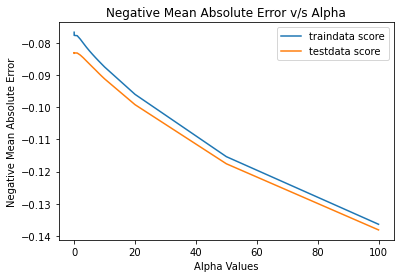

In [72]:
#Plotting the Negative Mean Absolute Error and Alpha Values
Ridge_crossvalid_results['param_alpha'] = Ridge_crossvalid_results['param_alpha'].astype('int32')
plt.plot(Ridge_crossvalid_results['param_alpha'], Ridge_crossvalid_results['mean_train_score'])
plt.plot(Ridge_crossvalid_results['param_alpha'], Ridge_crossvalid_results['mean_test_score'])
plt.xlabel('Alpha Values')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error v/s Alpha")
plt.legend(['traindata score', 'testdata score'], loc='upper right')
plt.show()

In [73]:
# Finding out the best score and Optimum value of alpha
print(Ridge_model_cv.best_estimator_)
best_ridge_score = Ridge_model_cv.best_score_
best_ridge_alpha = Ridge_model_cv.best_params_["alpha"]

print("Best R2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=0.5)
Best R2 score is obtained at alpha 0.5


In [74]:
#Building the model using the best alpha based on R2 Score
ridge = Ridge(alpha=best_ridge_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [75]:
#creating coeffcients for the ridge regression
Ridge_model_parameter = list(ridge.coef_)
Ridge_model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,Ridge_model_parameter,(abs(x) for x in Ridge_model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [76]:
#Printing the features, it's coefficient and mod values
ridge_coef.sort_values(by='Mod',ascending=False)

,Features,Coefficient,Mod
0,LotArea,10.511431,10.511431
2,OverallCond,0.526261,0.526261
7,2ndFlrSF,0.484574,0.484574
8,KitchenQual,0.389439,0.389439
3,BsmtQual,0.292933,0.292933
12,SaleCondition_Alloca,-0.277049,0.277049
1,OverallQual,0.273318,0.273318
5,BsmtUnfSF,0.271843,0.271843
16,GarageCars_1,-0.255270,0.255270
4,BsmtFinSF1,0.244580,0.244580


In [77]:
# Predicting using ridge regression and calculating the various scores 
y_train_ridge_pred = ridge.predict(X_train)
print("R2 score for Ridge Regression on train data:",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))

y_test_ridge_pred = ridge.predict(X_test)
print("R2 score for Ridge Regression on test data :",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

print()

RSS_Ridge_Train = np.sum(np.square(y_train - y_train_ridge_pred))
print('Residual Sum of Squares of the Ridge Model for the train data: ',RSS_Ridge_Train)

RSS_Ridge_Test = np.sum(np.square(y_test - y_test_ridge_pred))
print('Residual Sum of Squares of the Ridge Model for the train data: ',RSS_Ridge_Test)

print()

RMSE_Ridge_Train = (mean_squared_error(y_train, y_train_ridge_pred)**0.5)
print('Root Mean Squared Error of the Ridge Model for the train data: ',RMSE_Ridge_Train)


RMSE_Ridge_Test = mean_squared_error(y_test, y_test_ridge_pred)
print('Root Mean Squared Error of the Ridge Model for the test data : ',RMSE_Ridge_Test)

R2 score for Ridge Regression on train data: 0.9147
R2 score for Ridge Regression on test data : 0.8325

Residual Sum of Squares of the Ridge Model for the train data:  12.421646400769411
Residual Sum of Squares of the Ridge Model for the train data:  5.173277608186186

Root Mean Squared Error of the Ridge Model for the train data:  0.10724516047429301
Root Mean Squared Error of the Ridge Model for the test data :  0.019089585270059727


### <span style = 'color : SaddleBrown'>Step 6. Creating the Lasso Regression Model

In [78]:
#Randomly assuming an alpha value = 0.001 and building the Lasso Regression Model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print("R2 score for the Lasso model: ", r2_score(y_train,y_train_pred))

R2 score for the Lasso model:  0.899051446052049


In [79]:
#Fine tuning the alpha value by choosing a set of alpha values and then building the Lasso models
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Building the Ridge Regression Model
lasso = Lasso()

#Performing a 5 fold cross validation
Lasso_model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = 5, return_train_score=True, verbose = 1)            
Lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
#Best value for alpha and the corresponding score
print('Best value for alpha: ', Lasso_model_cv.best_params_)
print('Best Score: ', Lasso_model_cv.best_score_)

Best value for alpha:  {'alpha': 0.0001}
Best Score:  -0.08382494721968495


In [81]:
#Cross Validation results
Lasso_crossvalid_results = pd.DataFrame(Lasso_model_cv.cv_results_)
Lasso_crossvalid_results = Lasso_crossvalid_results[Lasso_crossvalid_results['param_alpha']<=100]
Lasso_crossvalid_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011049,0.003214,0.003574,0.001012,0.0001,{'alpha': 0.0001},-0.085575,-0.083747,-0.081474,-0.090220,...,-0.083825,0.004054,1,-0.076774,-0.077268,-0.077630,-0.076347,-0.079883,-0.077580,0.001231
1,0.005871,0.001194,0.003130,0.000567,0.001,{'alpha': 0.001},-0.088290,-0.081186,-0.086110,-0.095802,...,-0.086884,0.005087,2,-0.082689,-0.084118,-0.082857,-0.081539,-0.085515,-0.083343,0.001359
2,0.006364,0.000369,0.003452,0.000188,0.01,{'alpha': 0.01},-0.114993,-0.109359,-0.123179,-0.124640,...,-0.116794,0.006096,3,-0.112800,-0.114586,-0.114123,-0.113520,-0.116618,-0.114329,0.001292
3,0.006661,0.001182,0.003604,0.000286,0.05,{'alpha': 0.05},-0.246167,-0.256312,-0.273556,-0.251361,...,-0.254819,0.010061,4,-0.253390,-0.256619,-0.252873,-0.252753,-0.250712,-0.253269,0.001908
4,0.004058,0.000842,0.001968,0.000659,0.1,{'alpha': 0.1},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247
5,0.002951,0.000526,0.001577,0.000474,0.2,{'alpha': 0.2},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247
6,0.002746,0.000387,0.001224,0.000267,0.3,{'alpha': 0.3},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247
7,0.002522,0.000395,0.001611,0.000505,0.4,{'alpha': 0.4},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247
8,0.002337,0.000416,0.000916,0.000172,0.5,{'alpha': 0.5},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247
9,0.002409,0.000363,0.001839,0.000409,0.6,{'alpha': 0.6},-0.284000,-0.296976,-0.305794,-0.282179,...,-0.291298,0.008864,5,-0.292909,-0.289822,-0.287174,-0.293054,-0.292169,-0.291026,0.002247


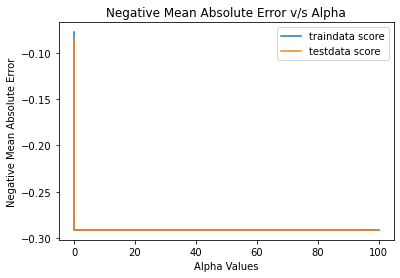

In [82]:
#Plotting the Negative Mean Absolute Error and Alpha Values
Lasso_crossvalid_results['param_alpha'] = Lasso_crossvalid_results['param_alpha'].astype('int32')
plt.plot(Lasso_crossvalid_results['param_alpha'], Lasso_crossvalid_results['mean_train_score'])
plt.plot(Lasso_crossvalid_results['param_alpha'], Lasso_crossvalid_results['mean_test_score'])
plt.xlabel('Alpha Values')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error v/s Alpha")
plt.legend(['traindata score', 'testdata score'], loc='upper right')
plt.show()

In [83]:
# Finding out the best score and Optimum value of alpha
print(Lasso_model_cv.best_estimator_)
best_lasso_score = Lasso_model_cv.best_score_
best_lasso_alpha = Lasso_model_cv.best_params_["alpha"]

print("Best R2 score is obtained at alpha {0}".format(best_lasso_alpha))

Lasso(alpha=0.0001)
Best R2 score is obtained at alpha 0.0001


In [84]:
#Building the model using the best alpha based on R2 Score
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [85]:
#creating coeffcients for the lasso regression
lasso_model_parameter = list(lasso.coef_)
lasso_model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter,(abs(x) for x in lasso_model_parameter))))
lasso_coef.columns = ['Features','Coefficient','Mod']

In [86]:
#Printing the features, it's coefficient and mod values
lasso_coef.sort_values(by='Mod',ascending=False)

,Features,Coefficient,Mod
0,LotArea,10.621489,10.621489
2,OverallCond,0.553350,0.553350
7,2ndFlrSF,0.506238,0.506238
8,KitchenQual,0.389278,0.389278
3,BsmtQual,0.301324,0.301324
12,SaleCondition_Alloca,-0.292421,0.292421
16,GarageCars_1,-0.289112,0.289112
1,OverallQual,0.278184,0.278184
5,BsmtUnfSF,0.253804,0.253804
4,BsmtFinSF1,0.226747,0.226747


In [87]:
# Predicting using lasso regression and calculating the various scores 
y_train_lasso_pred = lasso.predict(X_train)
print("R2 score for Lasso Regression on train data:",round(metrics.r2_score(y_true=y_train, y_pred=y_train_lasso_pred),4))

y_test_lasso_pred = lasso.predict(X_test)
print("R2 score for Lasso Regression on test data :",round(metrics.r2_score(y_true=y_test, y_pred=y_test_lasso_pred),4))

print()

RSS_lasso_Train = np.sum(np.square(y_train - y_train_lasso_pred))
print('Residual Sum of Squares of the Lasso Model for the train data: ',RSS_lasso_Train)

RSS_lasso_Test = np.sum(np.square(y_test - y_test_lasso_pred))
print('Residual Sum of Squares of the Lasso Model for the train data: ',RSS_lasso_Test)

print()

RMSE_lasso_Train = (mean_squared_error(y_train, y_train_lasso_pred)**0.5)
print('Root Mean Squared Error of the Lasso Model for the train data: ',RMSE_lasso_Train)


RMSE_lasso_Test = mean_squared_error(y_test, y_test_lasso_pred)
print('Root Mean Squared Error of the Lasso Model for the test data : ',RMSE_lasso_Test)

R2 score for Lasso Regression on train data: 0.9138
R2 score for Lasso Regression on test data : 0.8332

Residual Sum of Squares of the Lasso Model for the train data:  12.548245507385067
Residual Sum of Squares of the Lasso Model for the train data:  5.15073817840573

Root Mean Squared Error of the Lasso Model for the train data:  0.10779028639061758
Root Mean Squared Error of the Lasso Model for the test data :  0.019006413942456567


In [88]:
#Comparing the various metrics for Ridge and Lasso
compare_results = {'Model': ['Ridge', 'Lasso'], 
                   'Best Alpha' :[best_ridge_alpha ,best_lasso_alpha],
                   'R2 Train':[round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4), round(metrics.r2_score(y_true=y_train, y_pred=y_train_lasso_pred),4)],
                   'R2 Test':[round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4), round(metrics.r2_score(y_true=y_test, y_pred=y_test_lasso_pred),4)],
                   'RSS Train' : [RSS_Ridge_Train, RSS_lasso_Train],
                   'RSS Test' : [RSS_Ridge_Test, RSS_lasso_Test],
                   'RMSE Train' :[RMSE_Ridge_Train, RMSE_lasso_Train],
                   'RMSE Test' : [RMSE_Ridge_Test, RMSE_lasso_Test]
                  }

compare = pd.DataFrame(compare_results)
compare

,Model,Best Alpha,R2 Train,R2 Test,RSS Train,RSS Test,RMSE Train,RMSE Test
0,Ridge,0.5000,0.9147,0.8325,12.421646,5.173278,0.107245,0.019090
1,Lasso,0.0001,0.9138,0.8332,12.548246,5.150738,0.107790,0.019006


### <span style = 'color : SaddleBrown'>Step 7. Model Evaluation

In [89]:
#Coefficients in Ridge Model
ridge.coef_

array([ 0.27331807,  0.5262607 ,  0.2929334 ,  0.24458045,  0.27184329,
        0.17269742,  0.48457413,  0.38943949,  0.14342885,  0.1995512 ,
        0.11336911, -0.27704911, -0.1727212 , -0.18273404, -0.11129934,
       -0.25527025,  0.00752886,  0.04276459,  0.15153718,  0.17646969,
        0.07454017,  0.12715558,  0.0905641 ,  0.14188462,  0.09193482,
        0.16908706,  0.04500405,  0.11815415,  0.14199198, -0.01933982,
       -0.02288026, -0.01552689, -0.1109902 , -0.13307145, -0.11653391,
       -0.11022649, -0.07634481, -0.14081547, -0.04954297,  0.13940922,
        0.10461321,  0.1166546 ,  0.20735231, -0.12619439,  0.14025472,
       -0.1512743 ])

In [90]:
#Coefficients in Lasso Model
lasso.coef_

array([ 0.27818397,  0.55335007,  0.3013241 ,  0.22674742,  0.25380417,
        0.14779493,  0.50623836,  0.38927838,  0.13862425,  0.1827983 ,
        0.08319922, -0.29242147, -0.17273297, -0.17772049, -0.08819714,
       -0.28911202,  0.00573507,  0.04238481,  0.1387375 ,  0.13258357,
        0.02109324,  0.08420295,  0.04638272,  0.09357643,  0.03346212,
        0.12030268,  0.        ,  0.07329149,  0.07291194, -0.01874437,
       -0.01925586, -0.01360459, -0.08159456, -0.12786349, -0.09226116,
       -0.08870752, -0.0544366 , -0.1190178 , -0.02275829,  0.1217697 ,
        0.0797239 ,  0.09063826,  0.15790134, -0.12387642,  0.13527691,
       -0.13947568])

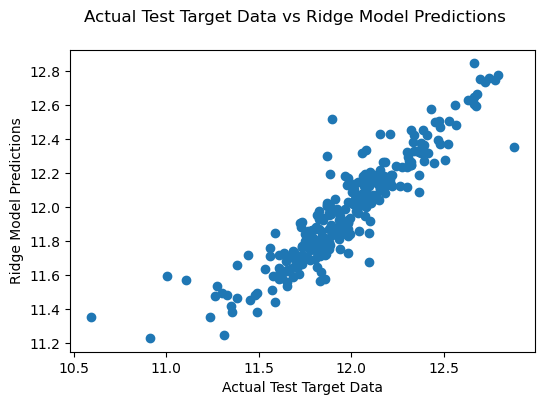

In [91]:
#Plotting actual test target data and Ridge Predicted data to understand the spread for Ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_ridge_pred)
fig.suptitle('Actual Test Target Data vs Ridge Model Predictions', fontsize=12)             
plt.xlabel('Actual Test Target Data', fontsize=10)                        
plt.ylabel('Ridge Model Predictions', fontsize=10)  
plt.show()

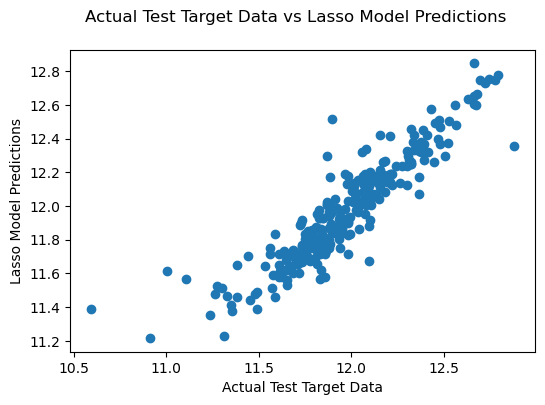

In [92]:
# Plotting actual test target data and Lasso Predicted data to understand the spread for Lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_lasso_pred)
fig.suptitle('Actual Test Target Data vs Lasso Model Predictions', fontsize=12)             
plt.xlabel('Actual Test Target Data', fontsize=10)                        
plt.ylabel('Lasso Model Predictions', fontsize=10)  
plt.show()

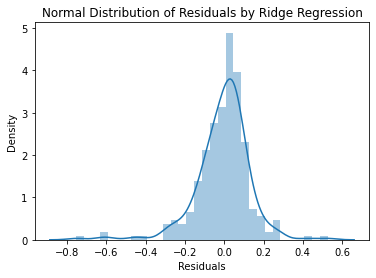

In [93]:
#Plotting the distribution of errors of Ridge Regression
y_res_ridge=y_test-y_test_ridge_pred
sns.distplot(y_res_ridge,kde=True)
plt.title('Normal Distribution of Residuals by Ridge Regression')
plt.xlabel("Residuals")
plt.show()

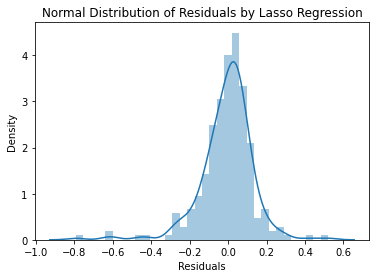

In [94]:
#Plotting the distribution of errors of Lasso Regression
y_res_lasso=y_test-y_test_lasso_pred
sns.distplot(y_res_lasso,kde=True)
plt.title('Normal Distribution of Residuals by Lasso Regression')
plt.xlabel("Residuals")
plt.show()

### <span style = 'color : ForestGreen' >Inference - As Lasso has slightly higher R2 scores as well as it has more coefficients as zero than Ridge, the better model in this case is Lasso Regression Model with alpha value 0.0001

### <span style = 'color : SaddleBrown'>Subjective Questions

### <span style = 'color : SaddleBrown'>Question 1

In [95]:
#Double the alphas
ridge = Ridge(alpha=(2*best_ridge_alpha))
ridge.fit(X_train, y_train)

Ridge()

In [96]:
#creating coeffcients for the ridge regression
Ridge_model_parameter = list(ridge.coef_)
Ridge_model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,Ridge_model_parameter,(abs(x) for x in Ridge_model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [97]:
#Printing the features, it's coefficient and mod values
ridge_coef.sort_values(by='Mod',ascending=False)

,Features,Coefficient,Mod
0,LotArea,10.597587,10.597587
2,OverallCond,0.514677,0.514677
7,2ndFlrSF,0.479685,0.479685
8,KitchenQual,0.385070,0.385070
3,BsmtQual,0.285897,0.285897
12,SaleCondition_Alloca,-0.270815,0.270815
5,BsmtUnfSF,0.266353,0.266353
1,OverallQual,0.259300,0.259300
4,BsmtFinSF1,0.237145,0.237145
16,GarageCars_1,-0.182688,0.182688


In [98]:
# Predicting using ridge regression and calculating the various scores 
y_train_ridge_pred = ridge.predict(X_train)
print("R2 score for Ridge Regression on train data:",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))

y_test_ridge_pred = ridge.predict(X_test)
print("R2 score for Ridge Regression on test data :",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

print()

RSS_Ridge_Train = np.sum(np.square(y_train - y_train_ridge_pred))
print('Residual Sum of Squares of the Ridge Model for the train data: ',RSS_Ridge_Train)

RSS_Ridge_Test = np.sum(np.square(y_test - y_test_ridge_pred))
print('Residual Sum of Squares of the Ridge Model for the train data: ',RSS_Ridge_Test)

print()

RMSE_Ridge_Train = (mean_squared_error(y_train, y_train_ridge_pred)**0.5)
print('Root Mean Squared Error of the Ridge Model for the train data: ',RMSE_Ridge_Train)


RMSE_Ridge_Test = mean_squared_error(y_test, y_test_ridge_pred)
print('Root Mean Squared Error of the Ridge Model for the test data : ',RMSE_Ridge_Test)

R2 score for Ridge Regression on train data: 0.9136
R2 score for Ridge Regression on test data : 0.8321

Residual Sum of Squares of the Ridge Model for the train data:  12.581390033909777
Residual Sum of Squares of the Ridge Model for the train data:  5.184277721806049

Root Mean Squared Error of the Ridge Model for the train data:  0.10793254938424797
Root Mean Squared Error of the Ridge Model for the test data :  0.019130176095225274


In [99]:
#Building the model using the best alpha based on R2 Score
lasso = Lasso(alpha=(2*best_lasso_alpha))
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [100]:
#creating coeffcients for the lasso regression
lasso_model_parameter = list(lasso.coef_)
lasso_model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter,(abs(x) for x in lasso_model_parameter))))
lasso_coef.columns = ['Features','Coefficient','Mod']

In [101]:
#Printing the features, it's coefficient and mod values
lasso_coef.sort_values(by='Mod',ascending=False)

,Features,Coefficient,Mod
0,LotArea,10.750934,10.750934
2,OverallCond,0.564597,0.564597
7,2ndFlrSF,0.516059,0.516059
8,KitchenQual,0.384403,0.384403
3,BsmtQual,0.302378,0.302378
12,SaleCondition_Alloca,-0.299658,0.299658
1,OverallQual,0.273624,0.273624
5,BsmtUnfSF,0.236625,0.236625
4,BsmtFinSF1,0.202777,0.202777
16,GarageCars_1,-0.191333,0.191333


In [102]:
# Predicting using lasso regression and calculating the various scores 
y_train_lasso_pred = lasso.predict(X_train)
print("R2 score for Lasso Regression on train data:",round(metrics.r2_score(y_true=y_train, y_pred=y_train_lasso_pred),4))

y_test_lasso_pred = lasso.predict(X_test)
print("R2 score for Lasso Regression on test data :",round(metrics.r2_score(y_true=y_test, y_pred=y_test_lasso_pred),4))

print()

RSS_lasso_Train = np.sum(np.square(y_train - y_train_lasso_pred))
print('Residual Sum of Squares of the Lasso Model for the train data: ',RSS_lasso_Train)

RSS_lasso_Test = np.sum(np.square(y_test - y_test_lasso_pred))
print('Residual Sum of Squares of the Lasso Model for the train data: ',RSS_lasso_Test)

print()

RMSE_lasso_Train = (mean_squared_error(y_train, y_train_lasso_pred)**0.5)
print('Root Mean Squared Error of the Lasso Model for the train data: ',RMSE_lasso_Train)


RMSE_lasso_Test = mean_squared_error(y_test, y_test_lasso_pred)
print('Root Mean Squared Error of the Lasso Model for the test data : ',RMSE_lasso_Test)

R2 score for Lasso Regression on train data: 0.9112
R2 score for Lasso Regression on test data : 0.8321

Residual Sum of Squares of the Lasso Model for the train data:  12.925532176467897
Residual Sum of Squares of the Lasso Model for the train data:  5.185368749702485

Root Mean Squared Error of the Lasso Model for the train data:  0.10939874473037332
Root Mean Squared Error of the Lasso Model for the test data :  0.019134202028422455


In [103]:
compare_double_results = {'Model': ['Ridge', 'Lasso'], 
                   'Best Alpha' :[(2*best_ridge_alpha) ,(2*best_lasso_alpha)],
                   'R2 Train':[round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4), round(metrics.r2_score(y_true=y_train, y_pred=y_train_lasso_pred),4)],
                   'R2 Test':[round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4), round(metrics.r2_score(y_true=y_test, y_pred=y_test_lasso_pred),4)],
                   'RSS Train' : [RSS_Ridge_Train, RSS_lasso_Train],
                   'RSS Test' : [RSS_Ridge_Test, RSS_lasso_Test],
                   'RMSE Train' :[RMSE_Ridge_Train, RMSE_lasso_Train],
                   'RMSE Test' : [RMSE_Ridge_Test, RMSE_lasso_Test]
                  }

compare_double = pd.DataFrame(compare_double_results)
compare_double

,Model,Best Alpha,R2 Train,R2 Test,RSS Train,RSS Test,RMSE Train,RMSE Test
0,Ridge,1.0000,0.9136,0.8321,12.581390,5.184278,0.107933,0.019130
1,Lasso,0.0002,0.9112,0.8321,12.925532,5.185369,0.109399,0.019134


In [104]:
compare.append(compare_double)

,Model,Best Alpha,R2 Train,R2 Test,RSS Train,RSS Test,RMSE Train,RMSE Test
0,Ridge,0.5000,0.9147,0.8325,12.421646,5.173278,0.107245,0.019090
1,Lasso,0.0001,0.9138,0.8332,12.548246,5.150738,0.107790,0.019006
0,Ridge,1.0000,0.9136,0.8321,12.581390,5.184278,0.107933,0.019130
1,Lasso,0.0002,0.9112,0.8321,12.925532,5.185369,0.109399,0.019134


In [105]:
#Top 5 Ridge Model features
list(ridge_coef.sort_values(by='Mod',ascending=False)['Features'].head(5))

['LotArea', 'OverallCond', '2ndFlrSF', 'KitchenQual', 'BsmtQual']

In [106]:
#Top 5 Lasso Model features
list(lasso_coef.sort_values(by='Mod',ascending=False)['Features'].head(5))

['LotArea', 'OverallCond', '2ndFlrSF', 'KitchenQual', 'BsmtQual']

### <span style = 'color : SaddleBrown'>Question 3

In [107]:
#Creating the new train and test data after removing the 5 above features
new_attr = list(lasso_coef.sort_values(by='Mod',ascending=False)['Features'])[6:]

In [108]:
np.random.seed(25)
housedata_train,housedata_test = train_test_split(housedata, train_size=0.8, test_size=0.2,random_state=100)
y_new_train=housedata_train.pop('SalePrice')
y_new_test=housedata_test.pop('SalePrice')
X_new_train=housedata_train
X_new_test=housedata_test

In [109]:
X_new_train = X_new_train[new_attr]
X_new_test = X_new_test[new_attr]

In [110]:
lasso_new = Lasso(alpha=best_lasso_alpha)
lasso_new.fit(X_new_train, y_new_train)

Lasso(alpha=0.0001)

In [111]:
#creating coeffcients for the lasso regression
lasso__new_model_parameter = list(lasso_new.coef_)
lasso__new_model_parameter.insert(0,lasso_new.intercept_)
cols = X_new_train.columns
cols.insert(0,'const')
lasso_new_coef = pd.DataFrame(list(zip(cols,lasso__new_model_parameter,(abs(x) for x in lasso__new_model_parameter))))
lasso_new_coef.columns = ['Features','Coefficient','Mod']

In [112]:
#Printing the features, it's coefficient and mod values
lasso_new_coef.sort_values(by='Mod',ascending=False)

,Features,Coefficient,Mod
0,OverallQual,10.484407,10.484407
6,Functional_Mod,-0.347760,0.347760
37,MSZoning_RL,0.300340,0.300340
17,GarageType_Basment,0.226566,0.226566
13,MSZoning_RH,0.207187,0.207187
12,Neighborhood_Crawfor,0.196018,0.196018
35,BsmtFinType1_1,0.188169,0.188169
39,GarageCars_3,-0.166291,0.166291
38,Neighborhood_BrDale,0.150664,0.150664
28,BsmtFinType1_2,0.150659,0.150659


In [113]:
#Top 5 features
list(lasso_new_coef.sort_values(by='Mod',ascending=False)['Features'].head(5))

['OverallQual',
 'Functional_Mod',
 'MSZoning_RL',
 'GarageType_Basment',
 'MSZoning_RH']